Лабораторна робота № 6
Смислов Даніл
ІП-01

Спочатку імпортуємо потрібні для роботи бібліотеки

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


Далі імпортуємо дані з файлу titanic.csv з кодуванням 'cp1252' та розділювачем ','. Розглянемо структуру датафрейму.

In [2]:
def getDataset():
    data = pd.read_csv('titanic.csv',sep=',',encoding='cp1252',decimal='.')
    return data 

dataset = getDataset()
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Давайте змінимо тип стовпчику 'Pclass'

In [3]:
dataset['Pclass'] = dataset['Pclass'].astype(str)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


Тепер давайте видалимо стовпчики, які нам не будуть потрібні для побудови моделі.

In [4]:
dataset = dataset.drop(columns=['PassengerId','Name','Ticket'])

dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


Давайте перевіримо дані на пропуски.

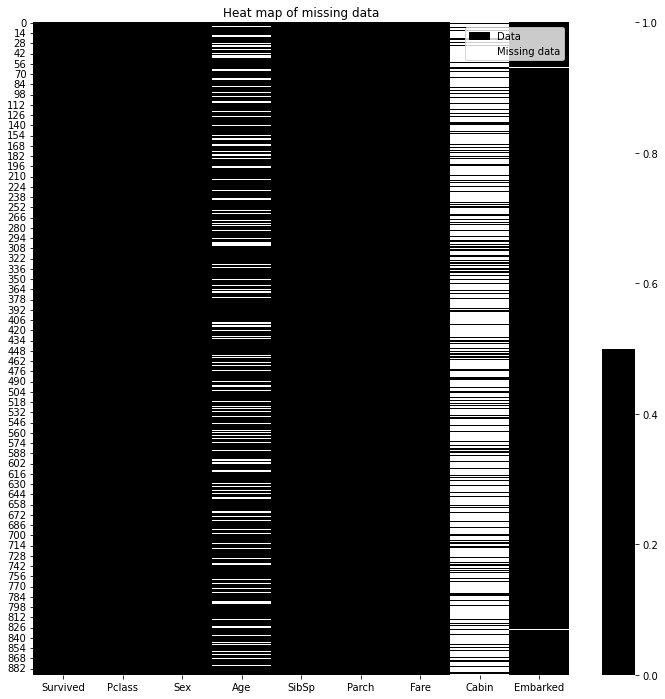

In [5]:
import matplotlib.patches as mpatches
import seaborn as sbrn
plt.figure(figsize =(12,12))
plt.title('Heat map of missing data')
lst = []
is_patch =mpatches.Patch(color = 'black', label = 'Data')
non_patch =mpatches.Patch(color = 'white', label = 'Missing data')
lst.append(is_patch)
lst.append(non_patch)
plt.legend(handles = lst,bbox_to_anchor = (1,1))
sbrn.heatmap(dataset.isna(),cmap = sbrn.color_palette(['Black','White']))
plt.show()


Тепер давайте ще подивимось на к-сть пропущених даних.

In [6]:
number = dataset.isnull().sum().sort_values(ascending=False)
percent = (number / (dataset.count()+dataset.isnull().sum())*100).sort_values(ascending=False)
missingData = pd.concat([number,percent],axis=1,keys = ['Number NaN','Percent NaN'])
missingData.head(10)

,Number NaN,Percent NaN
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000


Як ми бачимо, стовпець 'Cabin' має досить багато пропущених значень, тому давайте видалимо його. В стовцях 'Age' та 'Embarked' замінимо пропущені значення моди.

In [7]:
dataset = dataset.drop(columns = 'Cabin')
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mode()[0])
number = dataset.isnull().sum().sort_values(ascending=False)
percent = (number / (dataset.count()+dataset.isnull().sum())*100).sort_values(ascending=False)
missingData = pd.concat([number,percent],axis=1,keys = ['Number NaN','Percent NaN'])
missingData.head(10)

,Number NaN,Percent NaN
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


Як ми бачимо, тепер всі дані заповненні, тож ми готові працювати з даними. Тепер давайте розподілимо дані на тренувальні та дані для тесту.

In [8]:
from sklearn.model_selection import train_test_split
trainingData, testingData  = train_test_split(dataset,test_size=0.2,random_state = 1)
features = pd.concat([trainingData,testingData]).reset_index(drop = True)
features = pd.get_dummies(features)
trainingData = features.iloc[:trainingData.shape[0],:]
testingData = features.iloc[trainingData.shape[0]:,:]


Тепер визначимо змінні X та Y для тренувальних та тестувальних даних.

In [9]:
trainingX  = trainingData.drop(columns='Survived')
trainingY = trainingData['Survived']

testingX  = testingData.drop(columns='Survived')
testingY = testingData['Survived']

print(trainingY)

0      1
1      1
2      1
3      0
4      1
      ..
707    0
708    0
709    0
710    0
711    0
Name: Survived, Length: 712, dtype: int64


Додамо необхідні бібліотеки для побудови моделей, побудуємо їх та перевіримо на тестових даних. Спочатку класифікатор Decision Tree.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
decisionTree = DecisionTreeClassifier(max_depth=3,random_state=1)
tree_scores = cross_val_score(decisionTree,trainingX,trainingY,cv = 5)
print('Cvs in Decision Tree:', tree_scores.mean())
decisionTree.fit(trainingX,trainingY)
print('Score of Decision Tree:',decisionTree.score(testingX,testingY)) 

Cvs in Decision Tree: 0.83430513148823
Score of Decision Tree: 0.8044692737430168


Тепер класифікатор Random Forest. 

In [11]:
randomForest = RandomForestClassifier(max_depth=5)
tree_scores = cross_val_score(randomForest,trainingX,trainingY,cv = 5)
print('Cvs in Random Forest:', tree_scores.mean())
randomForest.fit(trainingX,trainingY)
print('Score of Random Forest:',randomForest.score(testingX,testingY)) 

Cvs in Random Forest: 0.8413473850093569
Score of Random Forest: 0.776536312849162


Тепер класифікатор Gradient Boosting.

In [12]:
gradientBoosting = GradientBoostingClassifier(learning_rate = 0.1)
tree_scores = cross_val_score(gradientBoosting,trainingX,trainingY,cv = 5)
print('Cvs in Gradient Boosting:', tree_scores.mean())
gradientBoosting.fit(trainingX,trainingY)
print('Score of Gradient Boosting:',gradientBoosting.score(testingX,testingY)) 

Cvs in Gradient Boosting: 0.827331823106471
Score of Gradient Boosting: 0.7877094972067039


Тепер класифікатор AdaBoost.

In [13]:
adaBoosting = AdaBoostClassifier(learning_rate = 0.3)
tree_scores = cross_val_score(adaBoosting,trainingX,trainingY,cv = 5)
print('Cvs in Ada Boosting:', tree_scores.mean())
adaBoosting.fit(trainingX,trainingY)
print('Score of Ada Boosting:',adaBoosting.score(testingX,testingY)) 

Cvs in Ada Boosting: 0.8062543090712104
Score of Ada Boosting: 0.7932960893854749


Як ми бачимо, на тестових даних найкраще себе показав класифікатор Decision Tree, адже в нього найвище значення score. Але можна сказати, що моделі в цілому показали досить схожий результат. Тепер давайте перейдемо до виконання додаткового завдання.

In [14]:
def getDataset():
    data = pd.read_csv('Data2.csv',sep=';',encoding='windows-1251',decimal=',')
    return data 

dataset = getDataset()
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0
5,Angola,Sub-Saharan Africa,3308.700233,28813463.0,34763.160,1246700.0
6,Antigua and Barbuda,Latin America & Caribbean,14462.176280,100963.0,531.715,440.0
7,Argentina,Latin America & Caribbean,12440.320980,43847430.0,204024.546,2780400.0
8,Armenia,Europe & Central Asia,3614.688357,2924816.0,5529.836,29740.0
9,Aruba,Latin America & Caribbean,NaN,104822.0,872.746,180.0


Тепер давайте перейменуємо стовпчик, з від'ємних значень зробимо абсолютні, пропуски заповнимо середніми.

In [15]:
dataset = dataset.rename(columns={'Populatiion':'Population'})
dataset['GDP per capita'] = abs(dataset['GDP per capita'])
dataset['Area'] = abs(dataset['Area'])
dataset = dataset.fillna(dataset.mean())
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  217 non-null    float64
 3   Population      217 non-null    float64
 4   CO2 emission    217 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


C:\Users\danil\AppData\Local\Temp\ipykernel_10704\735263001.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset = dataset.fillna(dataset.mean())


Додамо стовпчик зі щільністю населення, оберемо стовпчики для кластеризації.

In [16]:
dataset['Population density'] = dataset['Population']/dataset['Area']

features = dataset[['GDP per capita','Population density']]
print(features)

     GDP per capita  Population density
0        561.778746           53.083405
1       4124.982390          100.038296
2       3916.881571           17.048902
3      11834.745230          277.995000
4      36988.622030          164.427660
..              ...                 ...
212    13445.593416          294.145714
213     2943.404534          756.074086
214      990.334774           52.245796
215     1269.573537           22.045136
216     1029.076649           41.330643

[217 rows x 2 columns]


Тепер потрібно визначити к-сть кластерів, адже вона нам не відома. Скористаємось методом "локтя".

In [17]:
from sklearn.cluster import KMeans
args= {
    'init':'random',
    'random_state': 42
}

sse = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **args)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)
print(sse)

[62376608668.3652, 16653219153.300232, 9888703650.836306, 5457080671.229424, 4674162611.615391, 3419141167.4773836, 2209432774.6377473, 2045263745.3172152, 1888267055.5109823, 1563576612.0692024]


Давайте зобразимо залежність SSE від кількості кластерів на графіку, щоб обрати оптимальну кількість кластерів.

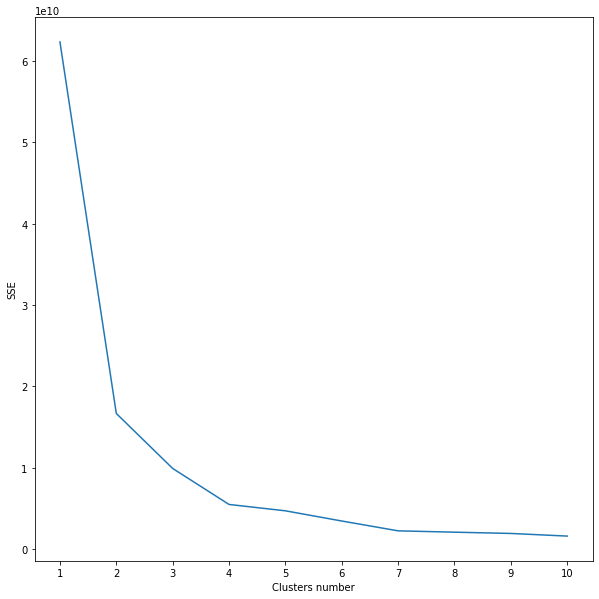

In [18]:
plt.figure(figsize = (10,10))
plt.plot(range(1,11),sse)
plt.xlabel('Clusters number')
plt.ylabel('SSE')
plt.xticks(range(1,11))
plt.show()

Як ми бачимо оптимально буде взяти 3 або 4 кластери. Для перевірки давайте додатково скористаємось бібліотекою kneed.

In [19]:
from kneed import KneeLocator
knee = KneeLocator(range(1,11),sse,curve='convex',direction = 'decreasing')
print('Elbow by kneed: ',knee.elbow)

Elbow by kneed:  3


Тоді оберемо 3 кластери.

In [20]:
kmeans = KMeans(
    init = 'random',
    n_clusters = 3,
    random_state = 42
)
kmeans.fit(features)

KMeans(init='random', n_clusters=3, random_state=42)

Тепер давайте візуалізуємо наші кластери.

In [21]:
import plotly.express as px
fig = px.scatter(dataset,x  ='GDP per capita', y = 'Population density',
    color = kmeans.labels_,hover_data = ['Country Name','Region'])
fig.update(layout_coloraxis_showscale=False)
fig.show()

Тепер давайте візуалізуємо частоти всіх показників у вигляді гістограм, використовуючи цикл. 

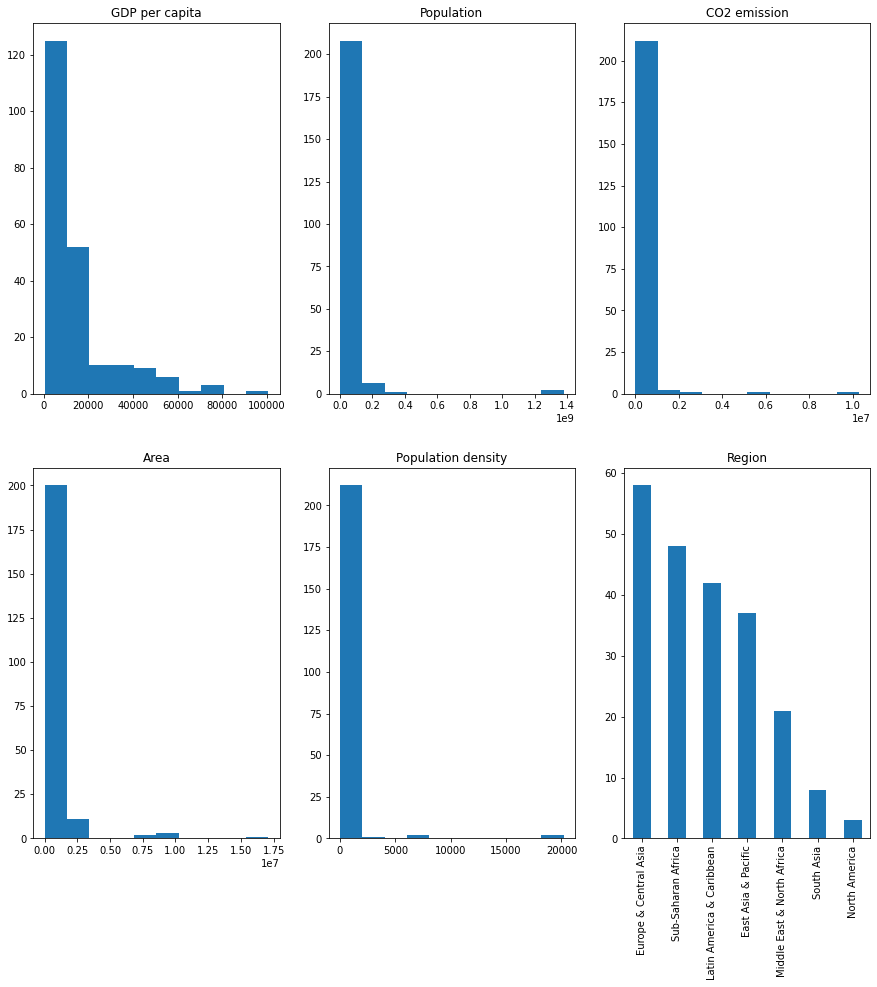

In [22]:
fig, axes = plt.subplots(2,3,figsize=(15,15))

labels = dataset.columns[2:]
for i in range(5):
    axes[i//3][i%3].set_title(labels[i])
    axes[i//3][i%3].hist(dataset[labels[i]])
axes[1][2].set_title('Region')
axes[1][2] = dataset['Region'].value_counts().plot(kind='bar')
plt.show()

Тепер давайте напишемо функцію для перевірки лінійної залежності між наборами даних.

In [23]:
def isCorr(x,y):
    print(np.corrcoef(x,y))
    return abs(np.corrcoef(x,y)[0,1])>0.8
x = np.random.randint(0, 100, 100)
y = -x + np.random.normal(0, 10, 100)

isCorr(x,y)

[[ 1.         -0.95752618]
 [-0.95752618  1.        ]]


True

Як бачимо, згенеровані дані досить сильно лінійно залежні, адже абсолютні значення x генеруються, в основному, значно більші за y та y залежить від значень x. 